In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd

import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

from customdataset import CustomMNISTDataset
import matplotlib.pyplot as plt

In [19]:
'''
class MNISTForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
''' 
class MNISTForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.fc1 = nn.LazyLinear(input_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.LazyLinear(num_classes)
        self.flatten = nn.Flatten()

    def forward(self, x):

        x = self.flatten(x)  # Flatten the input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [20]:
input_size = 28 * 28
hidden_size = 128
num_classes = 10
batch_size = 64
learning_rate = 0.001
num_epochs = 10

In [21]:
transform_dt = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) ])

custom_dataset = CustomMNISTDataset('train.csv', transform=transform_dt)

train_size = int(0.8 * len(custom_dataset))
test_size = len(custom_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(custom_dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

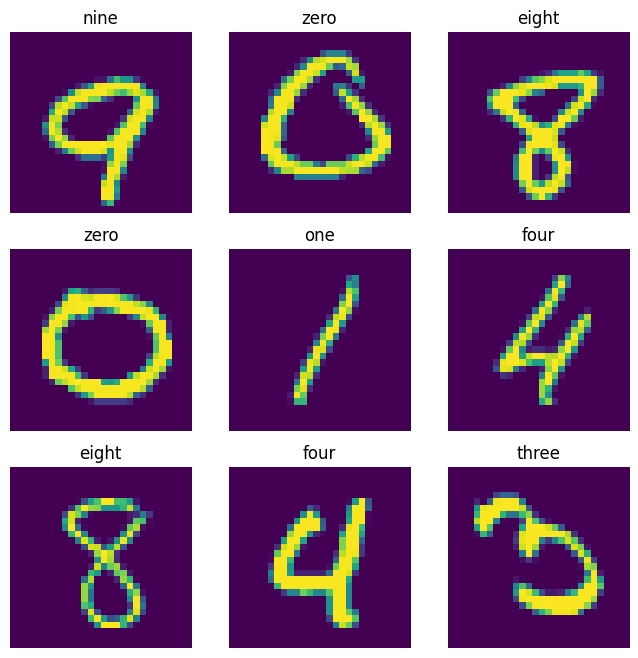

In [22]:
labels_map = {
    0:'zero',										
    1:'one',										
    2:'two',									
    3:'three',										
    4:'four',										
    5:'five',									
    6:'six',										
    7:'seven',										
    8:'eight',										
    9:'nine',
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    
    img = img.permute(1, 2, 0)
    
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img)
    
plt.show()

In [23]:
model = MNISTForwardNN(input_size, hidden_size, num_classes)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

c:\Users\gabri\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [24]:
for epoch in range(num_epochs):
    for images, labels in train_loader:
        outputs = model(images)
        labels = labels.long()
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

Epoch [1/10], Loss: 0.540764331817627
Epoch [2/10], Loss: 0.6270112991333008
Epoch [3/10], Loss: 0.6203150749206543
Epoch [4/10], Loss: 0.18532253801822662
Epoch [5/10], Loss: 0.09831393510103226
Epoch [6/10], Loss: 0.6884037256240845
Epoch [7/10], Loss: 0.29945528507232666
Epoch [8/10], Loss: 0.6179282069206238
Epoch [9/10], Loss: 0.5143616795539856
Epoch [10/10], Loss: 0.075531005859375


In [25]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy on test dataset: {(100 * correct / total):.2f}%')

Accuracy on test dataset: 94.86%
